# Data Balancing

## Setup

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import ds_functions as ds
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

data1 = pd.read_csv('Datasets/heart_failure_clinical_records_dataset.csv', sep=',', decimal='.')
data2 = pd.read_csv('Datasets/qsar_oral_toxicity.csv', sep=';', decimal='.')

## Aux Functions

In [17]:
def balance_SMOTE(X, y):
    smote = SMOTE(sampling_strategy='minority', random_state=42)
    smote_X, smote_y = smote.fit_sample(X, y)
    return smote_X, smote_y

def balance_undersample(X, y):
    rus = RandomUnderSampler() 
    X_rus, y_rus = rus.fit_resample(X, y)
    return X_rus, y_rus

def balance_oversample(X, y):
    ros = RandomOverSampler()
    X_ros, y_ros = ros.fit_resample(X, y)
    return X_ros, y_ros

## Heart Failure Dataset

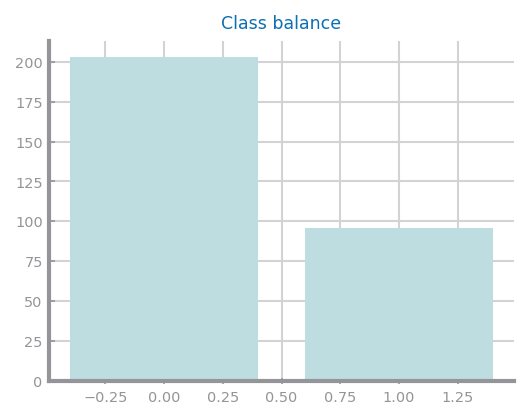

Minority class: 96
Majority class: 203
Proportion: 0.47 : 1


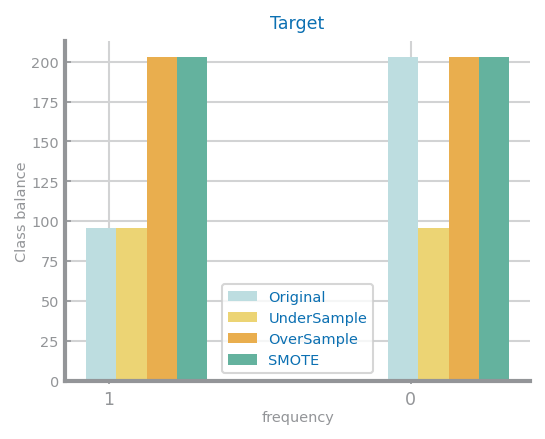

In [18]:
unbal = data1.copy()
target_count = unbal['DEATH_EVENT'].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1')

RANDOM_STATE = 42
values = {'Original': [target_count.values[ind_min_class], target_count.values[1-ind_min_class]]}

df_class_min = unbal[unbal['DEATH_EVENT'] == min_class]
df_class_max = unbal[unbal['DEATH_EVENT'] != min_class]

y = unbal.pop('DEATH_EVENT').values
X = unbal.values

under_X, under_y = balance_undersample(X, y)
under_target_count = pd.Series(under_y).value_counts()
values['UnderSample'] = [under_target_count.values[ind_min_class], under_target_count.values[1-ind_min_class]]

over_X, over_y = balance_oversample(X, y)
over_target_count = pd.Series(over_y).value_counts()
values['OverSample'] = [over_target_count.values[ind_min_class], over_target_count.values[1-ind_min_class]]


smote_X, smote_y = balance_SMOTE(X, y)
smote_target_count = pd.Series(smote_y).value_counts()
values['SMOTE'] = [smote_target_count.values[ind_min_class], smote_target_count.values[1-ind_min_class]]

fig = plt.figure()
ds.multiple_bar_chart([target_count.index[ind_min_class], target_count.index[1-ind_min_class]], values,
                      title='Target', xlabel='frequency', ylabel='Class balance')
plt.show()

## Oral Toxicity Dataset

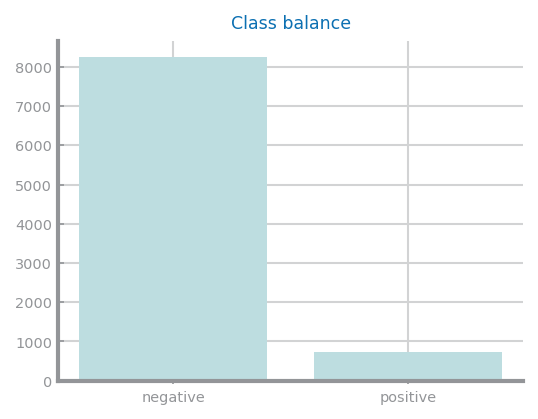

Minority class: 741
Majority class: 8250
Proportion: 0.09 : 1


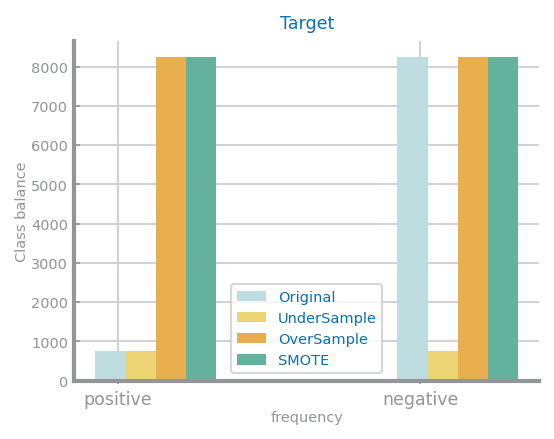

In [5]:
unbal = data2.copy()
target_count = unbal[unbal.columns[-1]].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1')

RANDOM_STATE = 42
values = {'Original': [target_count.values[ind_min_class], target_count.values[1-ind_min_class]]}

df_class_min = unbal[unbal[unbal.columns[-1]] == min_class]
df_class_max = unbal[unbal[unbal.columns[-1]] != min_class]

y = unbal.pop(unbal.columns[-1]).values
X = unbal.values

under_X, under_y = balance_undersample(X, y)
under_target_count = pd.Series(under_y).value_counts()
values['UnderSample'] = [under_target_count.values[ind_min_class], under_target_count.values[1-ind_min_class]]

over_X, over_y = balance_oversample(X, y)
over_target_count = pd.Series(over_y).value_counts()
values['OverSample'] = [over_target_count.values[ind_min_class], over_target_count.values[1-ind_min_class]]


smote_X, smote_y = balance_SMOTE(X, y)
smote_target_count = pd.Series(smote_y).value_counts()
values['SMOTE'] = [smote_target_count.values[ind_min_class], smote_target_count.values[1-ind_min_class]]

fig = plt.figure()
ds.multiple_bar_chart([target_count.index[ind_min_class], target_count.index[1-ind_min_class]], values,
                      title='Target', xlabel='frequency', ylabel='Class balance')
plt.show()

## Testing

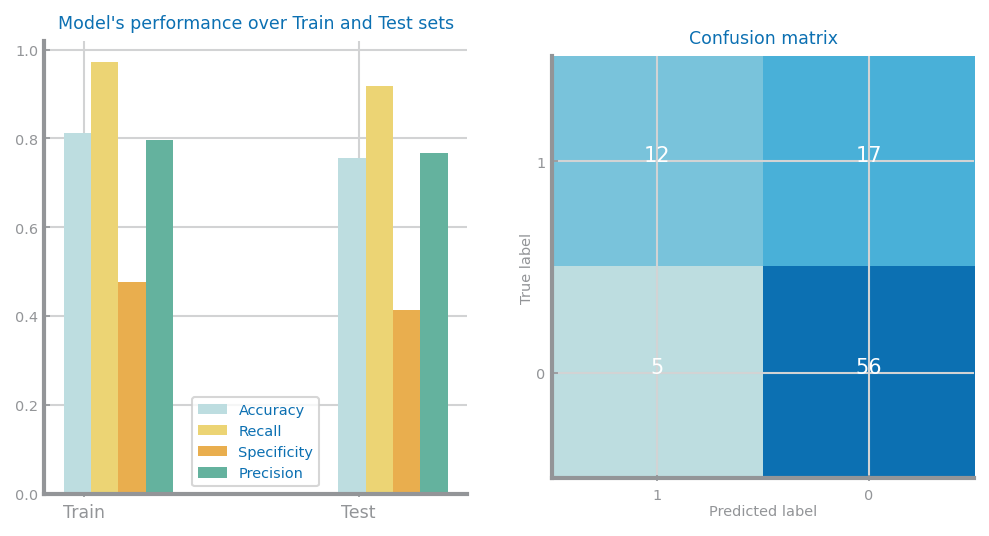

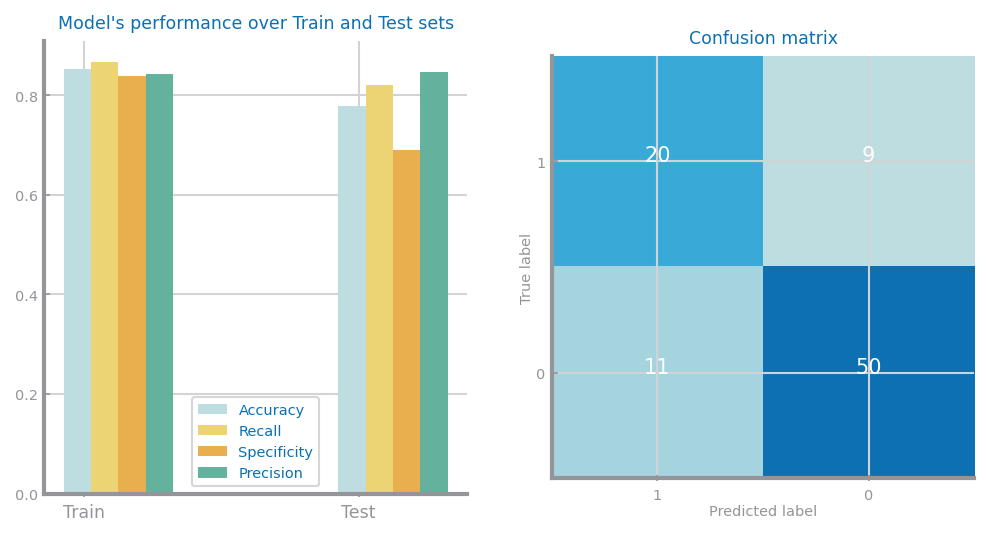

In [15]:
unbal = data1.copy()
y = unbal.pop('DEATH_EVENT').values
X = unbal.values

RANDOM_STATE = 40

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y, random_state=RANDOM_STATE)

clf = GaussianNB()
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)


trnX, trnY = balance_SMOTE(trnX, trnY)

clf = GaussianNB()
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

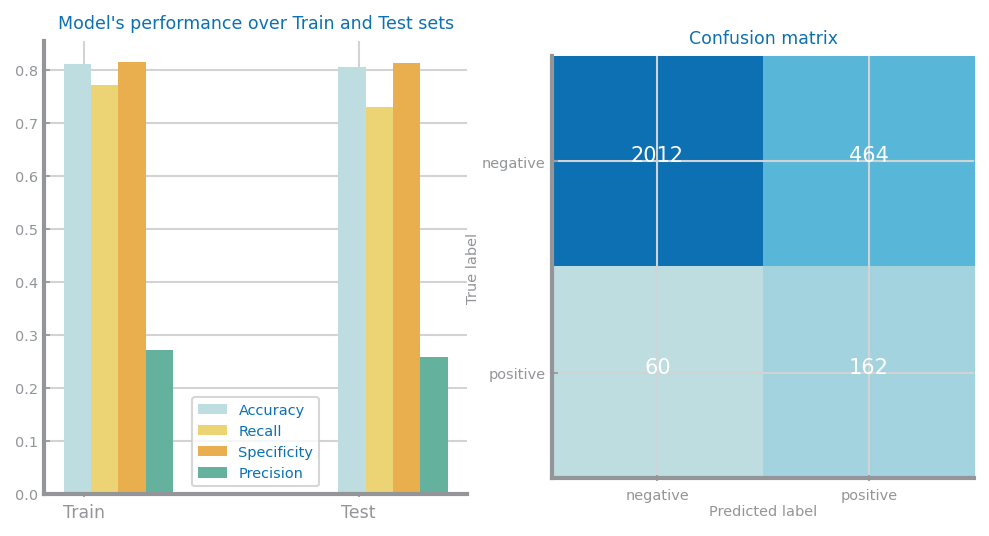

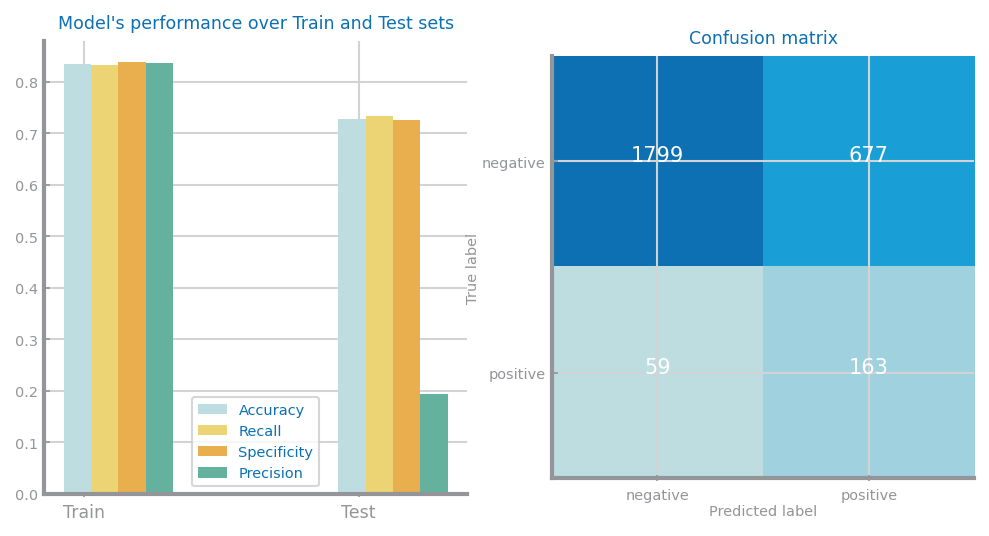

In [11]:
unbal = data2.copy()
y = unbal.pop(data2.columns[-1]).values
X = unbal.values

RANDOM_STATE = 42

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y, random_state=RANDOM_STATE)

clf = GaussianNB()
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)


trnX, trnY = balance_undersample(trnX, trnY)

clf = GaussianNB()
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)